In [43]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

# Importing Project Data

In [3]:
columns=["fLength","fWidth","fSize","fConc","fConc1","fAsym","fM3Long","fM3Trans","fAlpha","fDist","class"]

In [4]:
df=pd.read_csv(r"C:\Users\harsh\Desktop\ml\magic04.data",names=columns)

In [6]:
df["class"]=(df["class"]=='g').astype(int)

In [ ]:
# now 1 will represent gama and 0 will represent hadron

In [9]:
df

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,0
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,0
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,0
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,0


# Finding relationships

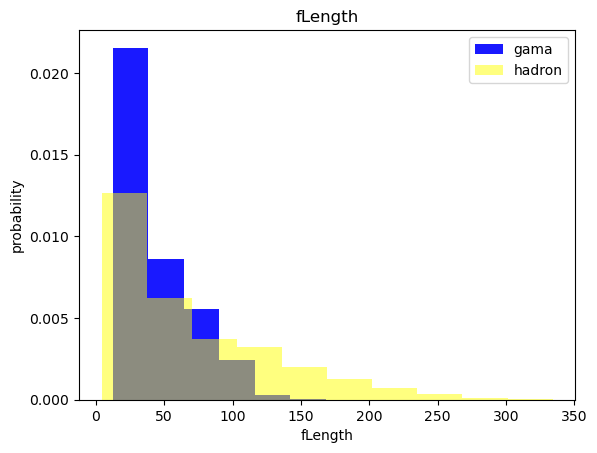

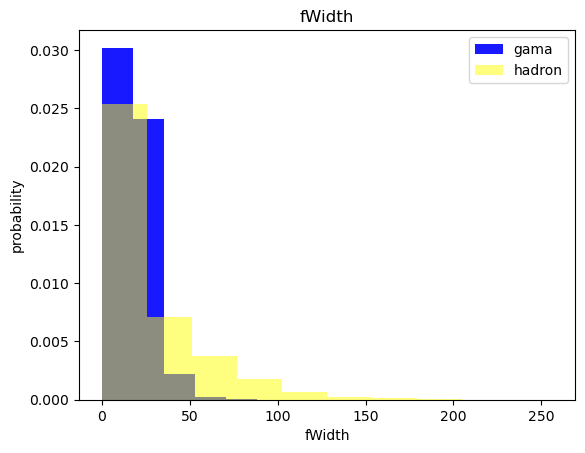

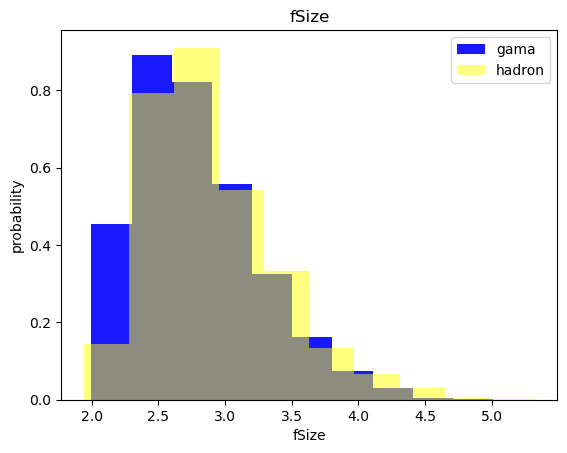

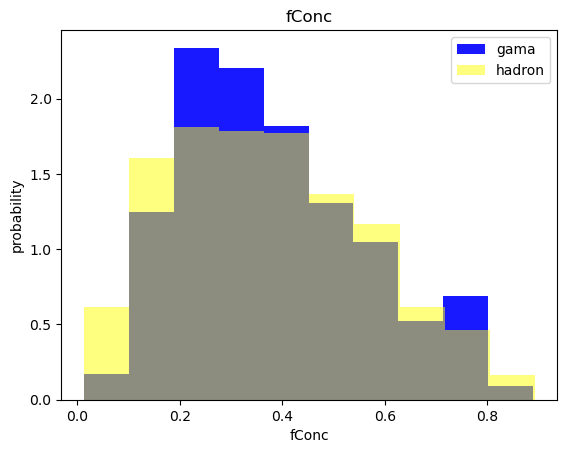

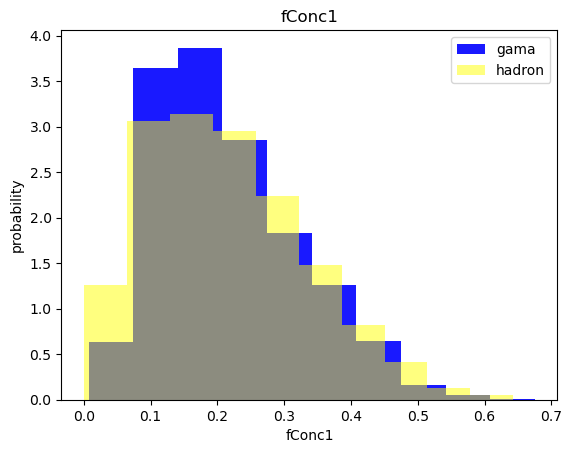

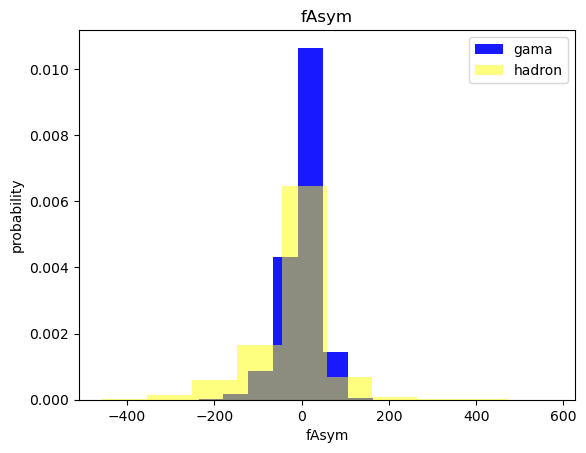

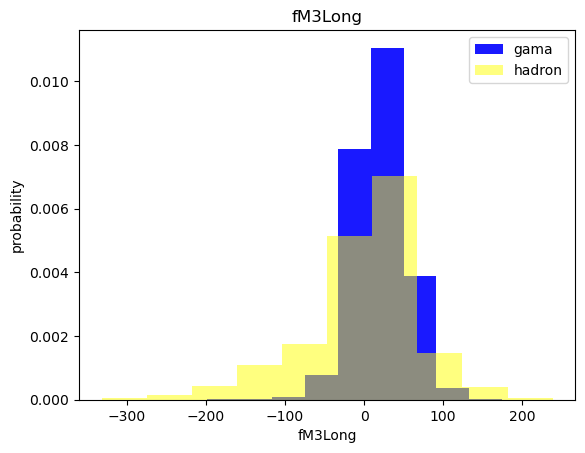

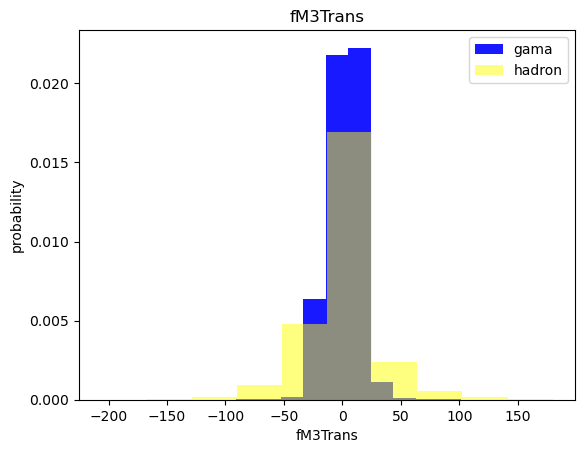

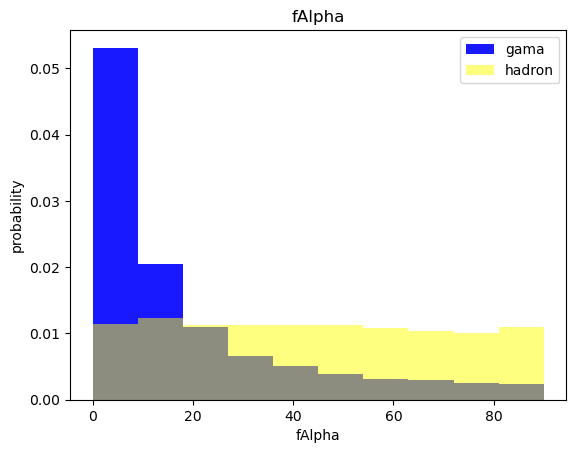

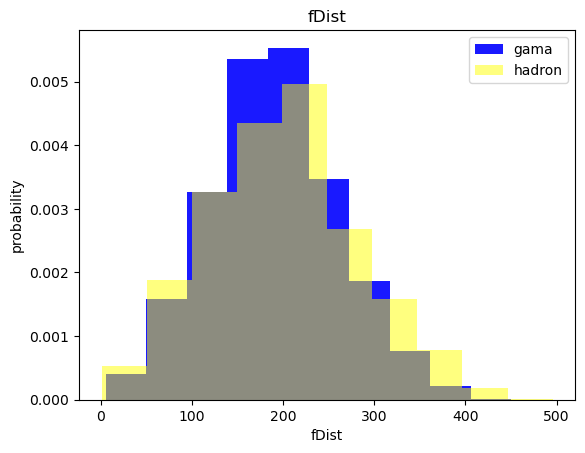

In [34]:
for col in columns[:-1]:
    plt.hist(df[df["class"]==1][col],label="gama" , density=True,alpha=0.9,color="blue")
    plt.hist(df[df["class"]==0][col],label="hadron",density=True,alpha=0.5,color="yellow" )
    plt.title(col)
    plt.ylabel("probability")
    plt.xlabel(col)
    plt.legend()
    plt.show()
    

# Data Preparation Of Train,Validation And Test Datasets

In [36]:
train ,valid ,test = np.split(df.sample(frac=1), [int(0.6*len(df)),int(0.8*len(df))])

C:\Users\harsh\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [38]:
train.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
10213,42.1685,32.0539,3.2265,0.1621,0.0893,-5.8709,25.6648,24.3848,33.8695,114.0130,1
9231,19.3627,7.4401,2.0737,0.7426,0.4430,1.2864,-6.8666,4.4826,60.3490,111.7530,1
4529,31.3882,24.8083,2.9340,0.2887,0.1636,26.4126,15.4992,-6.0742,2.2670,193.0640,1
9339,40.1970,23.2498,2.7352,0.2833,0.1720,19.5691,42.3323,-16.5679,8.6032,77.4700,1
5778,22.0140,16.4877,2.6508,0.4313,0.2246,-19.6349,-15.2749,-12.3711,17.1919,91.2358,1


In [ ]:
# standardizing value ranges so that it does not affect the algorithm

In [56]:
def scale_dataset(dataframe,oversampler=False):
    x=dataframe[dataframe.columns[:-1]].values
    y=dataframe[dataframe.columns[-1]].values
  
    scalar =StandardScaler()
    x=scalar.fit_transform(x)
  
    if oversampler:
        ros=RandomOverSampler()
        x,y=ros.fit_resample(x,y)
            
    data =np.hstack((x,np.reshape(y,(-1,1))))
    return data ,x,y

In [46]:
print(len(train[train["class"]==1])) #gama

7376


In [47]:
print(len(train[train["class"]==0])) #hadron

4036


In [ ]:
# so add over sampler to function

In [57]:
train , x_train, y_train = scale_dataset(train,oversampler=True)
valid , x_valid, y_valid = scale_dataset(train,oversampler=False)
test , x_test, y_test = scale_dataset(train,oversampler=False)

In [58]:
print(len(train))

14752


In [59]:
sum(y_train==1)

7376

# KNN (K - Nearest Neighbours) Model

In [64]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [61]:
knn_model =KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train,y_train)

KNeighborsClassifier()

In [63]:
y_pred=knn_model.predict(x_train)

In [68]:
# change values of neighbour to get max accuracy

In [67]:
print(classification_report(y_pred,y_train))

              precision    recall  f1-score   support

           0       0.89      0.90      0.89      7274
           1       0.90      0.89      0.90      7478

    accuracy                           0.90     14752
   macro avg       0.90      0.90      0.90     14752
weighted avg       0.90      0.90      0.90     14752



# Naive Bayes Model

In [71]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

In [74]:
Nb_model =GaussianNB()
Nb_model=Nb_model.fit(x_train,y_train)

In [75]:
y_pred=Nb_model.predict(x_train)
print(classification_report(y_pred,y_train))

              precision    recall  f1-score   support

           0       0.41      0.80      0.54      3767
           1       0.90      0.60      0.72     10985

    accuracy                           0.65     14752
   macro avg       0.65      0.70      0.63     14752
weighted avg       0.77      0.65      0.68     14752



# logestic regression model

In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [88]:
lr_model =LogisticRegression()
lr_model=lr_model.fit(x_train,y_train)

In [89]:
y_pred=lr_model.predict(x_train)
print(classification_report(y_pred,y_train))

              precision    recall  f1-score   support

           0       0.72      0.81      0.76      6614
           1       0.83      0.75      0.79      8138

    accuracy                           0.78     14752
   macro avg       0.78      0.78      0.77     14752
weighted avg       0.78      0.78      0.78     14752



# supprot vector machines model

In [95]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [101]:
svm_model=SVC()
svm_model=svm_model.fit(x_train,y_train)

In [104]:
y_pred=svm_model.predict(x_train)
print(classification_report(y_pred,y_train))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85      6725
           1       0.90      0.83      0.86      8027

    accuracy                           0.86     14752
   macro avg       0.86      0.86      0.86     14752
weighted avg       0.86      0.86      0.86     14752

